# 第7章: 単語ベクトル
単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

## 60. 単語ベクトルの読み込みと表示
Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [ ]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/My Drive/GoogleNews-vectors-negative300.bin.gz', binary = True)
print(model["United_States"].shape)
print(model["United_States"])

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


(300,)
[-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2.38281250e-01 -2.79541016e-02 -1.21093750e-01  2.47802734e-02
  7.71484375e-02 -

##61. 単語の類似度
“United States”と”U.S.”のコサイン類似度を計算せよ．

In [ ]:
print(model.similarity("United_States", "U.S."))

0.73107743


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


##62. 類似度の高い単語10件
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [ ]:
print(model.most_similar('United_States', topn=10))

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Unites_States', 0.7877248525619507), ('Untied_States', 0.7541370391845703), ('United_Sates', 0.74007248878479), ('U.S.', 0.7310774326324463), ('theUnited_States', 0.6404393911361694), ('America', 0.6178410053253174), ('UnitedStates', 0.6167312264442444), ('Europe', 0.6132988929748535), ('countries', 0.6044804453849792), ('Canada', 0.6019070148468018)]











##63. 加法構成性によるアナロジー

“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [ ]:
vec_cnt = model['Spain'] - model['madrid'] + model['Athens'] 
print(model.most_similar([vec_cnt], topn=10))

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Athens', 0.6826057434082031), ('Greece', 0.4856835603713989), ('Athens_Greece', 0.46644285321235657), ('Spain', 0.4448360502719879), ('Rome', 0.4141983985900879), ('Organising_Committee_ATHOC', 0.41101545095443726), ('prosecutor_Costas_Simitzoglou', 0.409780889749527), ('bronze_medalist_Alicia_Molik', 0.3909006714820862), ('Greek', 0.39005470275878906), ('silver_medalist_Mardy_Fish', 0.38434839248657227)]


In [ ]:
print(model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10))

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Greece', 0.6898481249809265), ('Aristeidis_Grigoriadis', 0.5606848001480103), ('Ioannis_Drymonakos', 0.5552908778190613), ('Greeks', 0.545068621635437), ('Ioannis_Christou', 0.5400862693786621), ('Hrysopiyi_Devetzi', 0.5248444676399231), ('Heraklio', 0.5207759737968445), ('Athens_Greece', 0.516880989074707), ('Lithuania', 0.5166866183280945), ('Iraklion', 0.5146791934967041)]


##64. アナロジーデータでの実験
単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [ ]:
#ダウンロード、読込
!wget http://download.tensorflow.org/data/questions-words.txt
!head -10 questions-words.txt > test.txt
!head -10 questions-words.txt

--2020-07-25 14:42:31--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.204.128, 2607:f8b0:400c:c15::80
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.204.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt.1’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.003s  

2020-07-25 14:42:31 (204 MB/s) - ‘questions-words.txt.1’ saved [603955/603955]

: capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
Athens Greece Beijing China
Athens Greece Berlin Germany
Athens Greece Bern Switzerland
Athens Greece Cairo Egypt
Athens Greece Canberra Australia
Athens Greece Hanoi Vietnam
Athens Greece Havana Cuba


In [ ]:
#1行ずつ読み込んで類似した単語と類似度を格納
#テスト用→with open('./test.txt', 'r') as f:
with open('./questions-words.txt', 'r') as f, open('./result_add.txt', 'w') as f_w:
  for line in f:
    line = line.split()
    if line[0] == ':':
      f_w.write(' '.join(line) + '\n')
    else:
      word, vec = model.most_similar(positive=[line[1], line[2]], negative=[line[0]], topn=1)[0]
      line = line + [word, str(vec)]
      f_w.write(' '.join(line) + '\n')

!head -10 result_add.txt

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


: capital-common-countries
Athens Greece Baghdad Iraq Iraqi 0.6351870894432068
Athens Greece Bangkok Thailand Thailand 0.7137669324874878
Athens Greece Beijing China China 0.7235777974128723
Athens Greece Berlin Germany Germany 0.6734622120857239
Athens Greece Bern Switzerland Switzerland 0.4919748306274414
Athens Greece Cairo Egypt Egypt 0.7527809739112854
Athens Greece Canberra Australia Australia 0.583732545375824
Athens Greece Hanoi Vietnam Viet_Nam 0.6276341676712036
Athens Greece Havana Cuba Cuba 0.6460992097854614


##65. アナロジータスクでの正解率
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [ ]:
#文法的アナロジーフラグ
flg = 0
#意味的アナロジー測定用
se_all = 0
se_true = 0
#文法的アナロジー測定用
sy_all = 0
sy_true = 0

with open('./result_add.txt', 'r') as f:
  for line in f:
    line = line.split()
    if line[0] == ':':
      flg = 0
      #gramで始まる(文法的アナロジー)の場合flgを立てる
      if line[1].startswith('gram'):
        flg = 1
    #意味的アナロジー
    elif flg == 0:
      se_all += 1
      #正解時追加
      if line[3] == line[4]:
        se_true += 1
    #文法的アナロジー
    elif flg == 1:
      sy_all += 1
      #正解時追加
      if line[3] == line[4]:
        sy_true += 1

#正解率
print(se_true / se_all)
print(sy_true / sy_all)

0.7308602999210734
0.7400468384074942


##66. WordSimilarity-353での評価
The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [ ]:
#ダウンロード、読込
!wget http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
!unzip wordsim353.zip
!head -10 combined.csv

--2020-08-03 20:50:58--  http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving www.gabrilovich.com (www.gabrilovich.com)... 208.97.177.37
Connecting to www.gabrilovich.com (www.gabrilovich.com)|208.97.177.37|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23257 (23K) [application/zip]
Saving to: ‘wordsim353.zip’

wordsim353.zip      100%[===================>]  22.71K  --.-KB/s    in 0.08s   

2020-08-03 20:50:58 (276 KB/s) - ‘wordsim353.zip’ saved [23257/23257]

Archive:  wordsim353.zip
  inflating: combined.csv            
  inflating: set1.csv                
  inflating: set2.csv                
  inflating: combined.tab            
  inflating: set1.tab                
  inflating: set2.tab                
  inflating: instructions.txt        
Word 1,Word 2,Human (mean)
love,sex,6.77
tiger,cat,7.35
tiger,tiger,10.00
book,paper,7.46
computer,keyboard,7.62
computer,internet,7.58
plane,car,5.77
train,car,6.31
telephone,communication,7.5

In [ ]:
h_list = []
m_list = []

#1行ずつ読み込んで人評価とモデル類似度を格納
with open('./combined.csv', 'r') as f:
  for line in f:
    line = line.split(',')
    if line[0] == 'Word 1':
      pass
    else :
      h_list.append(line[2].strip())
      m_list.append(model.similarity(line[0], line[1]))

print(h_list[:10])
print(m_list[:10])

from scipy.stats import pearsonr
import numpy as np

# numpy配列にして相関係数を算出
a, b = pearsonr(np.asarray(h_list, dtype=np.float64), np.array(m_list))
print("相関係数:", a)

['6.77', '7.35', '10.00', '7.46', '7.62', '7.58', '5.77', '6.31', '7.50', '6.77']
[0.2639377, 0.5172962, 0.99999994, 0.3634626, 0.39639163, 0.40686232, 0.3779698, 0.3402561, 0.33218452, 0.6114971]
相関係数: 0.652534960755016


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


##67. k-meansクラスタリング
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．



In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

#読込
df = pd.read_csv('country.csv', encoding = 'UTF-8', header = None)
c_list = list(df[0])
#モデルのボキャブラリーにない単語は削除
c_list = [cnt for cnt in c_list if cnt in model.vocab]
print(c_list)

#ベクトル化、クラスタリング
c_vec = [model[cnt] for cnt in c_list]

c_cls = KMeans(n_clusters=5)
c_cls.fit(c_vec)

#クラス毎に表示
for i in range(5):
    c_ary = np.where(c_cls.labels_ == i)[0]
    print('クラス', i)
    print(', '.join([c_list[j] for j in c_ary]))

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Botswana', 'Brazil', 'Bulgaria', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Ecuador', 'Egypt', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Mauritania', 'Mau

##68. Ward法によるクラスタリング
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

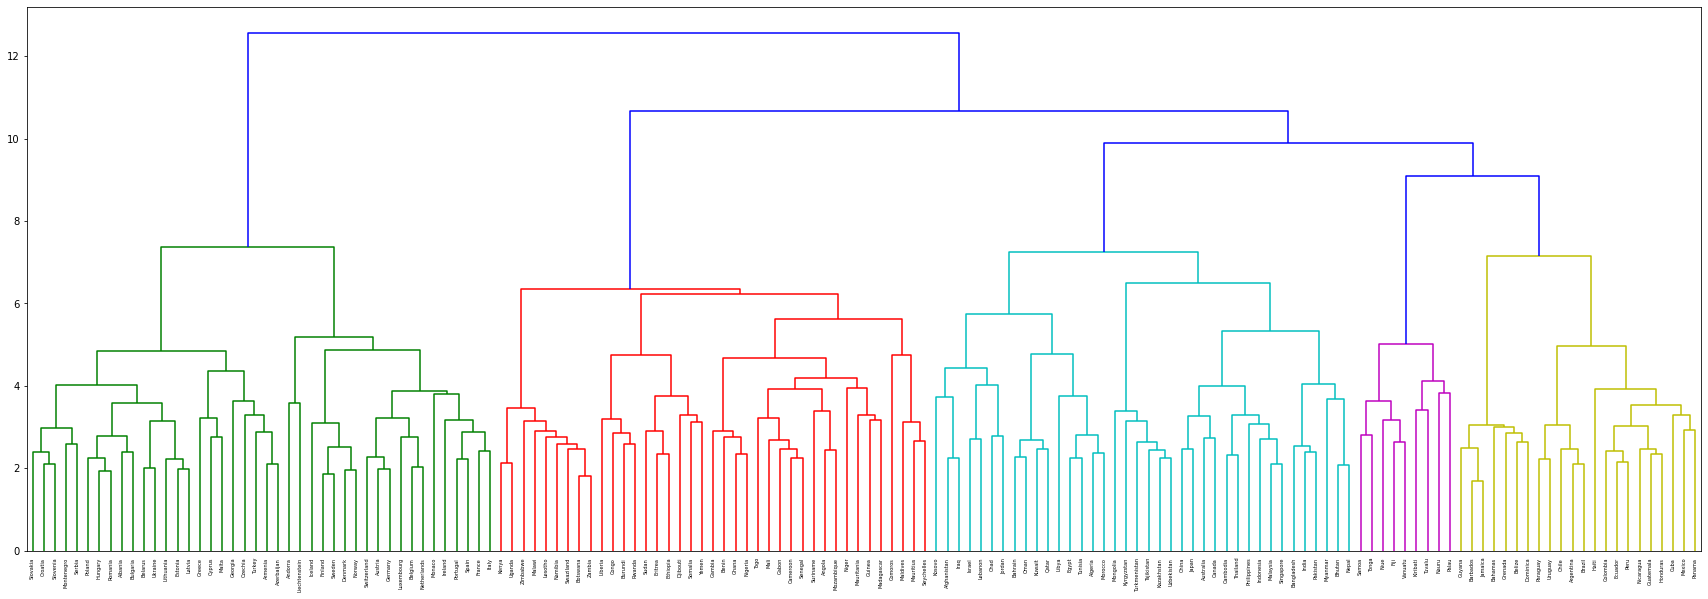

In [ ]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

#クラスタリング、デンドログラムでの可視化
plt.figure(figsize=(30, 10))
wclus = linkage(c_vec, method='ward', metric='euclidean')
dendrogram(wclus, labels=c_list)
plt.show()

##69. t-SNEによる可視化
ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

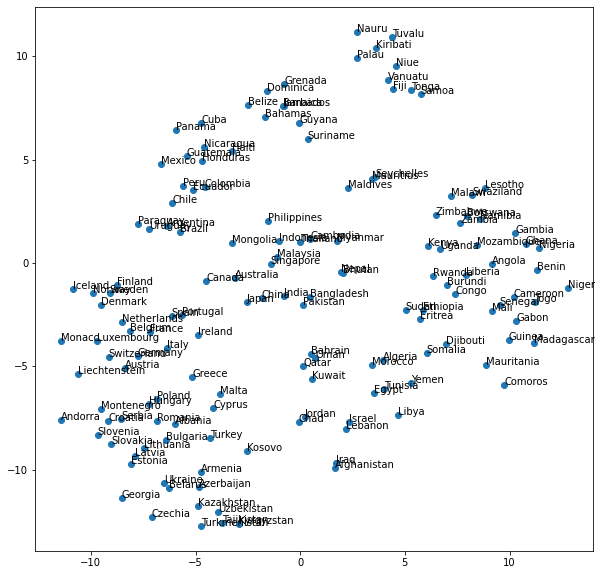

In [ ]:
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE

#tsneで次元削減
embedding = TSNE().fit_transform(c_vec)
#dataframe化
df = pd.DataFrame(embedding)

#グラフ作成
fig = plt.figure(figsize=(10.0, 10.0))
ax = fig.add_subplot(111)
ax.scatter(df[0], df[1])

#ラベリング
for i, c in zip(range(len(df)), c_list):
  ax.annotate(c, (df[0][i], df[1][i]))